#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#1) Delivery_time -> Predict delivery time using sorting time 

In [203]:
import pandas as pd
import seaborn as sns
import numpy as np

In [204]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [205]:
#EDA and Data visualisation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [206]:
# CHECKING FOR MISSING VALUES
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

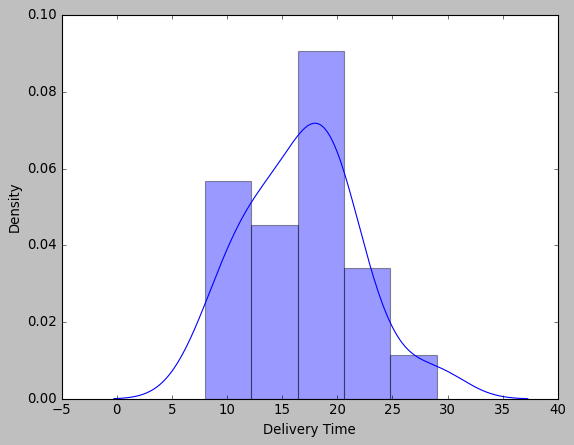

In [208]:
sns.distplot(df["Delivery Time"])

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

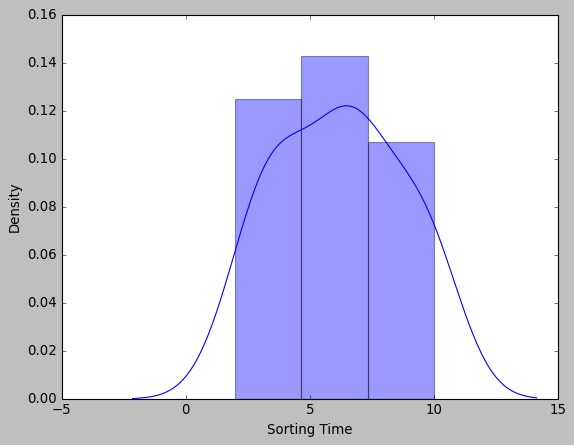

In [207]:
sns.distplot(df["Sorting Time"])

In [217]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


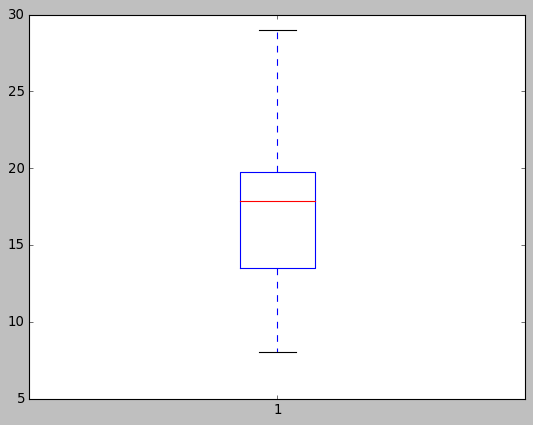

In [218]:
plt.boxplot(df.delivery_time) 
plt.show() 

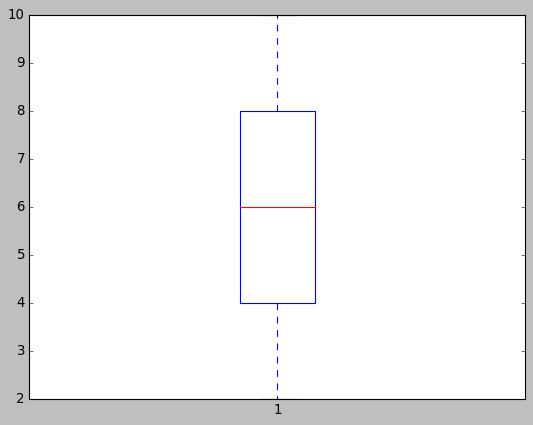

In [219]:
plt.boxplot(df.sorting_time) 
plt.show()

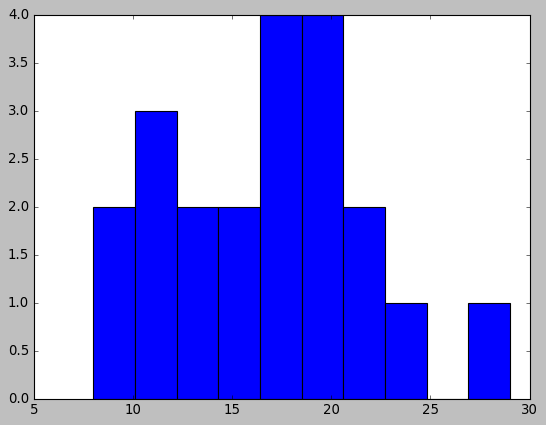

In [220]:
plt.hist(df.delivery_time) 
plt.show() 

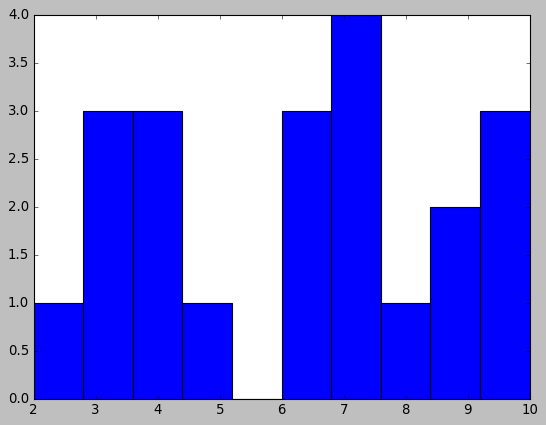

In [221]:
plt.hist(df.sorting_time) 
plt.show()

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

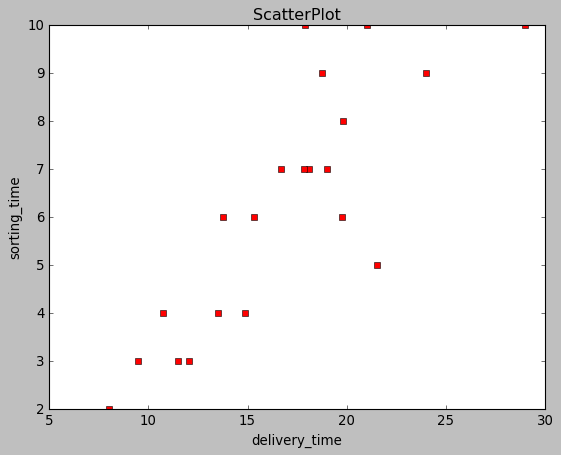

In [222]:
plt.plot(df.delivery_time,df.sorting_time,"rs")
plt.xlabel("delivery_time")
plt.ylabel("sorting_time")
plt.title("ScatterPlot")   
help(plt.plot) 

In [223]:
# correlation MATRIX
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [224]:
# Model Building
import statsmodels.formula.api as smf 
mmodel = smf.ols('delivery_time~sorting_time',data=df).fit()

In [225]:
mmodel.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
mmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        15:18:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
mmodel.resid  

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

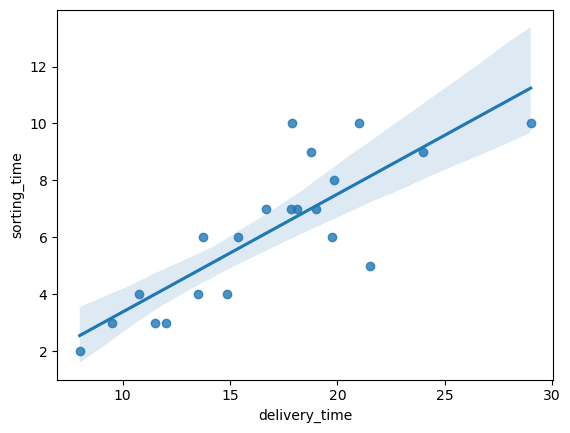

In [20]:
sns.regplot(x=df["delivery_time"],y=df["sorting_time"])

In [227]:
#t and p-Values
print(mmodel.tvalues, '\n', mmodel.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [228]:
#R squared values
(mmodel.rsquared,mmodel.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

#predict New data

In [229]:
newdata=pd.Series([5,8])  
newdata

0    5
1    8
dtype: int64

In [242]:
manualdata_pred=pd.DataFrame(newdata,columns=['sorting_time'])  
manualdata_pred

,sorting_time
0,5
1,8


In [232]:
mmodel.predict(manualdata_pred)

0    14.827833
1    19.774893
dtype: float64

In [240]:
mmodel.resid  

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [247]:
data_pred1 =mmodel2.predict(pd.DataFrame(df['delivery_time'])) 
data_pred1 

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [248]:
mmodel.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

Text(0, 0.5, 'st')

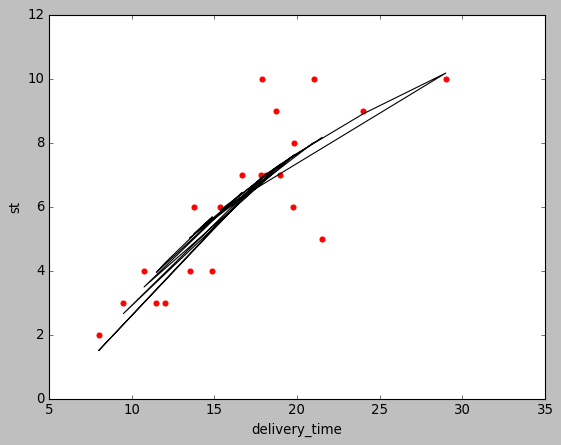

In [250]:
import matplotlib.pylab as plt
plt.scatter(x=df['delivery_time'],y=df['sorting_time'],color='red')
plt.plot(df['delivery_time'],data_pred1,color='black')
plt.xlabel('delivery_time')
plt.ylabel('st') 


In [251]:
#print(model.conf_int(0.05))
rmse_lin = np.sqrt(np.mean((np.array(df['sorting_time'])-np.array(data_pred))**2))
rmse_lin 

2.9154759474226504

In [252]:
mmodel2 = smf.ols('sorting_time~np.log(delivery_time)',data=df).fit()

In [253]:
mmodel2.params

Intercept               -12.499233
np.log(delivery_time)     6.735548
dtype: float64

In [31]:
mmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        15:19:45   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
data_pred2 =mmodel2.predict(pd.DataFrame(df['delivery_time'])) 
data_pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [255]:
rmse_log = np.sqrt(np.mean((np.array(df['sorting_time'])-np.array(data_pred2))**2))
rmse_log 

1.3337477286899515

In [256]:
data_pred2.corr(df.sorting_time)

0.8431772637224146

Text(0, 0.5, 'st')

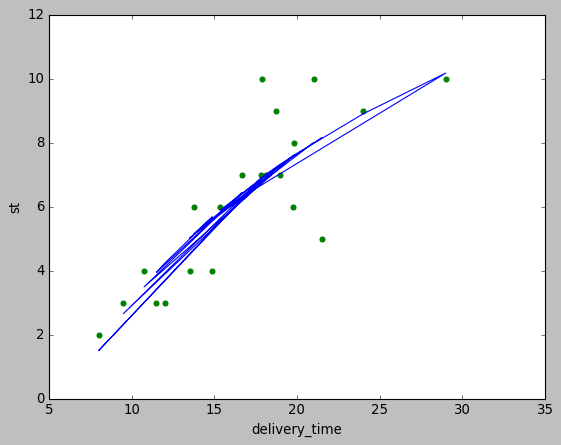

In [257]:
import matplotlib.pyplot as plt
plt.scatter(x=df['delivery_time'],y=df['sorting_time'],color='green')
plt.plot(df['delivery_time'],data_pred2,color='blue')
plt.xlabel('delivery_time')
plt.ylabel('st')

In [258]:
mmodel3 = smf.ols('np.log(sorting_time)~delivery_time',data=df).fit()

In [259]:
mmodel3.params

Intercept        0.437237
delivery_time    0.076901
dtype: float64

In [37]:
mmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Wed, 04 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                          15:19:57   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
data_pred_log = mmodel3.predict(pd.DataFrame(df['delivery_time']))
data_pred_log 

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [261]:
data_pred3=np.exp(data_pred_log) 
data_pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [262]:
rmse_exp= np.sqrt(np.mean((np.array(df['sorting_time'])-np.array(data_pred3))**2)) 
rmse_exp

1.7921450016869793

In [263]:
data_pred3.corr(df.sorting_time)

0.7472768828616799

Text(0, 0.5, 'st')

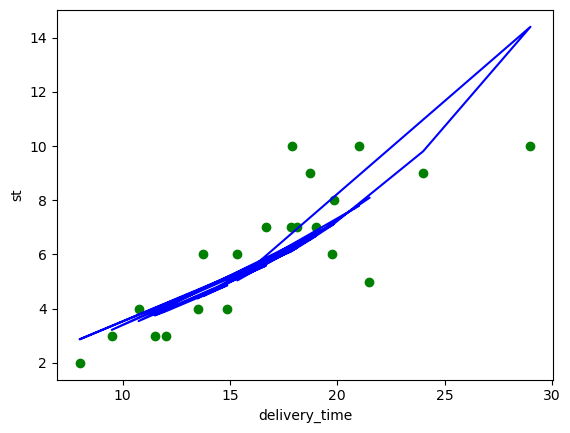

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x=df['delivery_time'],y=df['sorting_time'],color='green')
plt.plot(df['delivery_time'],data_pred3,color='blue')
plt.xlabel('delivery_time')
plt.ylabel('st')

In [264]:
dt_resid = mmodel3.resid_pearson 
dt_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

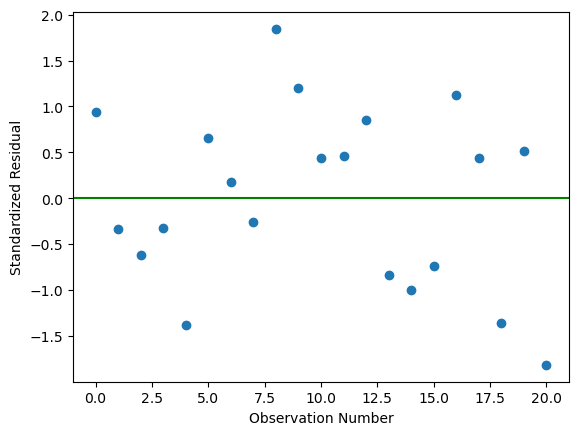

In [48]:
plt.plot(mmodel3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

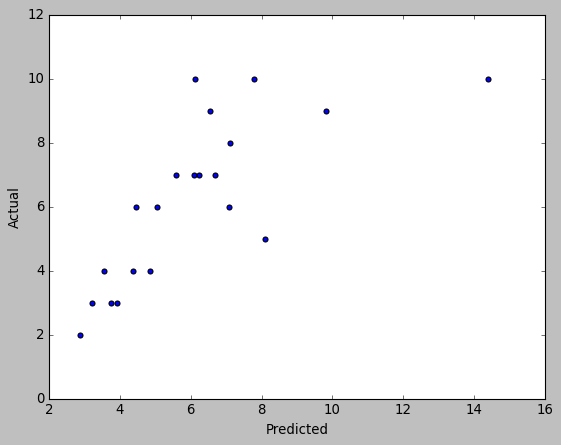

In [265]:
plt.scatter(x=data_pred3,y=df.sorting_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [267]:
df["delivery_time_Sq"] = df.delivery_time*df.delivery_time
df 

,delivery_time,sorting_time,delivery_time_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [268]:
mmodel_quad = smf.ols("np.log(sorting_time)~delivery_time+delivery_time_Sq",data=df).fit()

In [269]:
mmodel_quad

In [270]:
mmodel_quad.params

Intercept          -0.778048
delivery_time       0.227222
delivery_time_Sq   -0.004271
dtype: float64

In [53]:
mmodel_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Wed, 04 Jan 2023   Prob (F-statistic):           6.77e-07
Time:                          15:21:33   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
delivery_time        0.2272      0.052      4.346      0.000       0.117       0.337
delivery_time_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [271]:
data_pred_quad = mmodel_quad.predict(df)
data_pred4=np.exp(data_pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
data_pred4

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [272]:
rmse_quad = np.sqrt(np.mean((np.array(df['sorting_time'])-np.array(data_pred4))**2))
rmse_quad

1.347141980025572

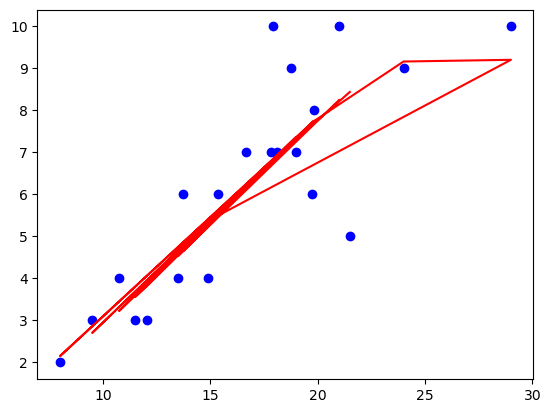

In [56]:
plt.scatter(df.delivery_time,df.sorting_time,c="b")
plt.plot(df.delivery_time,data_pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

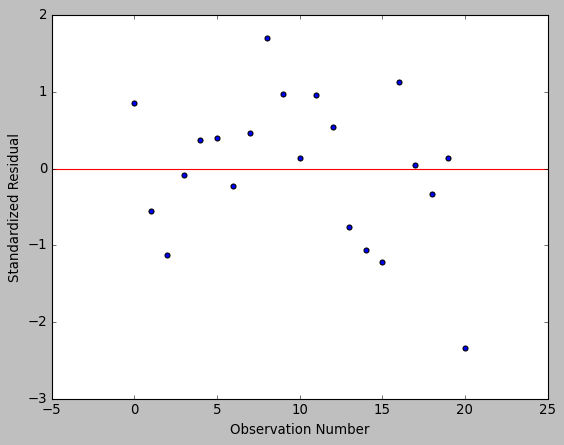

In [273]:
plt.scatter(np.arange(21),mmodel_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")  

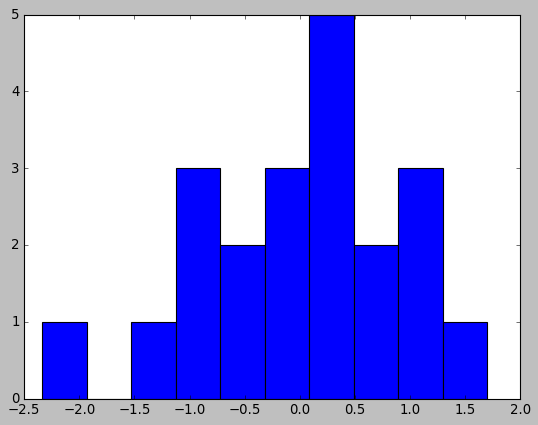

In [274]:
plt.hist(mmodel_quad.resid_pearson)
plt.show() 

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

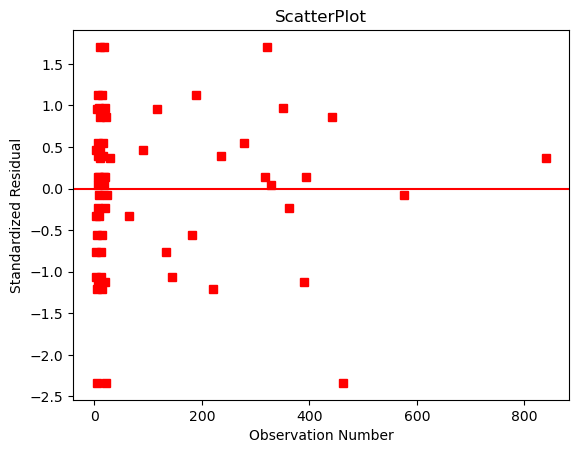

In [70]:
#plt.scatter(mmodel_quad.resid_pearson,'o')
#plt.axhline(y=0,color='red')
#plt.xlabel("Observation Number")
#plt.ylabel("Standardized Residual") 
plt.plot(df,mmodel_quad.resid_pearson,"rs")
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.title("ScatterPlot")   
help(plt.plot)

In [275]:
dat = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([mmodel.rsquared,mmodel2.rsquared,mmodel3.rsquared,mmodel_quad.rsquared])}
tabl=pd.DataFrame(dat)
tabl 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.915476,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_exp,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


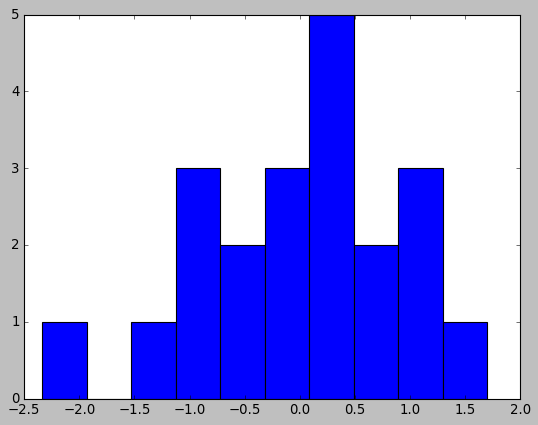

In [276]:
plt.hist(mmodel_quad.resid_pearson)  
plt.show() 

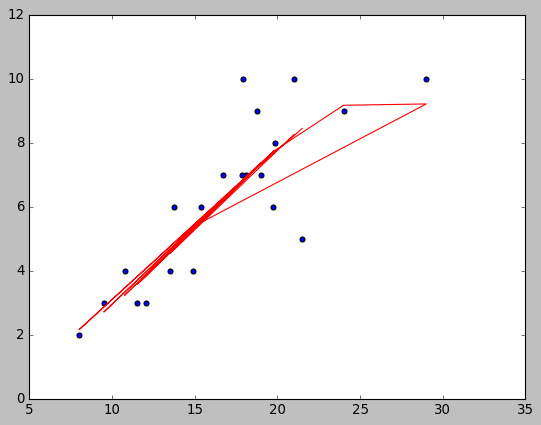

In [277]:
plt.scatter(df.delivery_time,df.sorting_time,c="b")
plt.plot(df.delivery_time,data_pred4,"r")

#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#2) Salary_hike -> Build a prediction model for Salary_hike

In [122]:
# dependent variable=YearsExperience
#Independant variable=Salary
sd=pd.read_csv("Salary_Data.csv")
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [123]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [77]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0.5, 1.0, 'ScatterPlot')

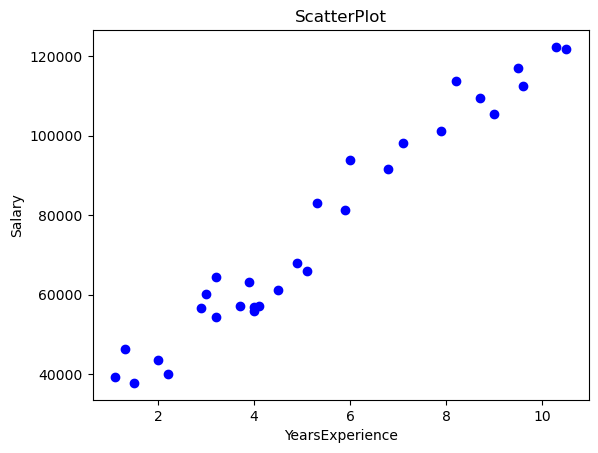

In [78]:
import matplotlib.pyplot as plt
plt.plot(sd.YearsExperience,sd.Salary, "bo") 
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("ScatterPlot")

# Correlation

In [79]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [80]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

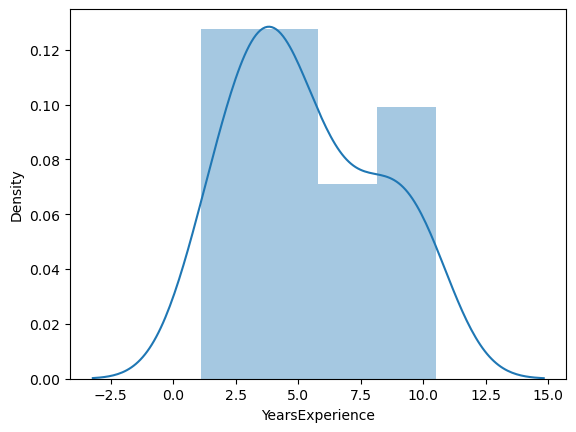

In [81]:
import seaborn as sns
sns.distplot(sd['YearsExperience'])

C:\Users\Swetha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

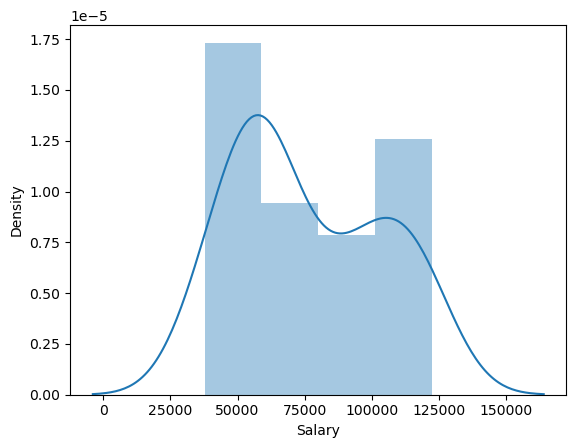

In [82]:
sns.distplot(sd['Salary'])

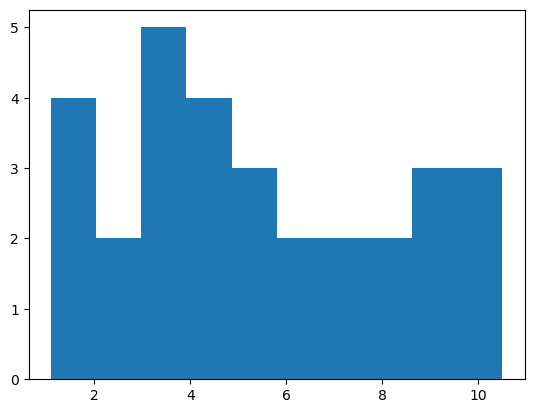

In [83]:
plt.hist(sd.YearsExperience)
plt.show()   

# Fitting Linear Regression Model

In [84]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = sd).fit() 

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        16:36:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

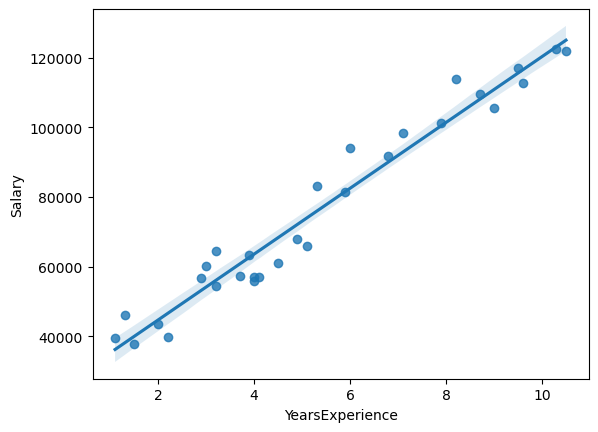

In [86]:
sns.regplot(x="YearsExperience", y="Salary", data=sd);

In [87]:
#Coefficients
model.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [88]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [90]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.9569566641435086, 0.9554194021486339)

In [89]:
model.resid  

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

# Model Prediction for salary hike

In [117]:
# Manual prediction for say 3 Years Experience, prediction=intercept+slope*independent variable
Salary1= (25792.200199) + (9449.962321)*(3)
Salary1

54142.087162

In [118]:
# Automatic Prediction for say 3 & 5 Years Experience 
newdata1=pd.Series([3,5])
newdata1

0    3
1    5
dtype: int64

In [119]:
manualpred=pd.DataFrame(newdata1,columns=['YearsExperience'])
manualpred

,YearsExperience
0,3
1,5


In [161]:
datapred1 = model2.predict(pd.DataFrame(sd['Salary'])) 
datapred1

0     0.901345
1     2.095676
2     0.590552
3     1.651785
4     1.004105
5     3.608650
6     4.055053
7     3.314768
8     4.567424
9     3.680047
10    4.424619
11    3.496591
12    3.649849
13    3.666005
14    4.172803
15    4.959542
16    4.747810
17    6.454999
18    6.299145
19    7.366932
20    7.190723
21    7.701920
22    7.927435
23    8.792461
24    8.500852
25    8.234853
26    8.995721
27    8.715235
28    9.332335
29    9.300766
dtype: float64

In [160]:
 model.resid_pearson 

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [162]:
rmse_lin = np.sqrt(np.mean((np.array(sd['YearsExperience'])-np.array(datapred1))**2))
rmse_lin   

0.7277682036871291

Text(0, 0.5, 'YearsExperience')

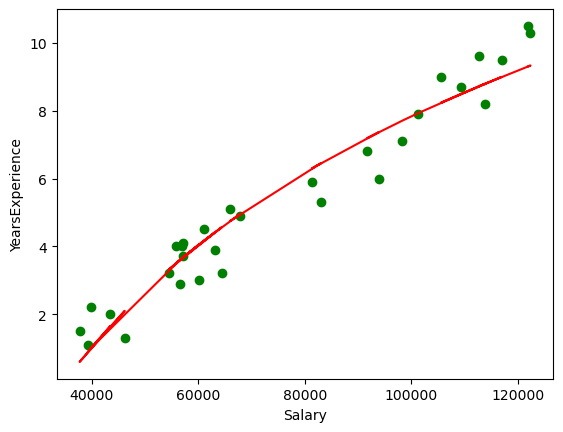

In [163]:
import matplotlib.pyplot as plt
plt.scatter(x=sd['Salary'],y=sd['YearsExperience'],color='green')
plt.plot(sd['Salary'],datapred1,color='red')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [157]:
model2 = smf.ols('YearsExperience~np.log(Salary)',data=sd).fit()

In [164]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        17:32:09   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
model2.params

Intercept        -77.696132
np.log(Salary)     7.428821
dtype: float64

In [166]:
datapred2 = model2.predict(pd.DataFrame(sd['Salary'])) 
datapred2

0     0.901345
1     2.095676
2     0.590552
3     1.651785
4     1.004105
5     3.608650
6     4.055053
7     3.314768
8     4.567424
9     3.680047
10    4.424619
11    3.496591
12    3.649849
13    3.666005
14    4.172803
15    4.959542
16    4.747810
17    6.454999
18    6.299145
19    7.366932
20    7.190723
21    7.701920
22    7.927435
23    8.792461
24    8.500852
25    8.234853
26    8.995721
27    8.715235
28    9.332335
29    9.300766
dtype: float64

In [167]:
rmse_log = np.sqrt(np.mean((np.array(sd['YearsExperience'])-np.array(datapred2))**2))
rmse_log  

0.7277682036871291

In [168]:
datapred2.corr(sd.YearsExperience)

0.9653844412504374

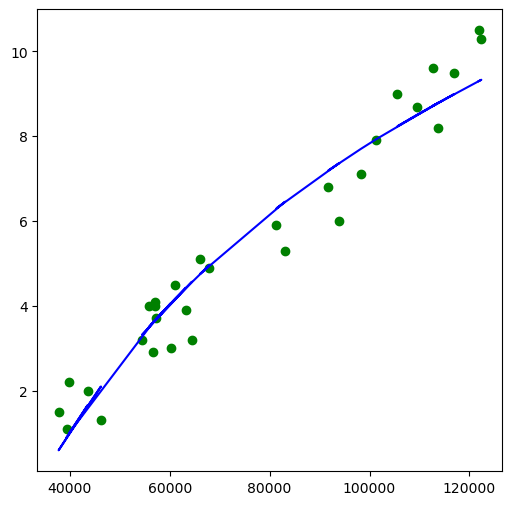

In [169]:
#scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.scatter(x=sd['Salary'],y=sd['YearsExperience'],color='green')
ax.plot(sd.Salary,datapred2,color='blue')
plt.show()

In [170]:
#exponential model
model3 = smf.ols('np.log(YearsExperience)~Salary',data=sd).fit()
model3.params

Intercept   -0.094207
Salary       0.000021
dtype: float64

In [139]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Wed, 04 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                             17:17:12   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
pred_log = model3.predict(pd.DataFrame(sd['Salary']))
pred_log

0     0.733613
1     0.877997
2     0.699694
3     0.821607
4     0.745143
5     1.097602
6     1.171414
7     1.051375
8     1.261786
9     1.109112
10    1.235969
11    1.079760
12    1.104230
13    1.106839
14    1.191635
15    1.335282
16    1.295115
17    1.654055
18    1.617759
19    1.882393
20    1.836060
21    1.973564
22    2.037297
23    2.300521
24    2.208340
25    2.127353
26    2.366948
27    2.275756
28    2.481032
29    2.470112
dtype: float64

In [142]:
#we have used log() in model so we need to converting
datapred3=np.exp(pred_log)  
datapred3


0      2.082591
1      2.406075
2      2.013138
3      2.274150
4      2.106743
5      2.996972
6      3.226553
7      2.861583
8      3.531723
9      3.031665
10     3.441710
11     2.943971
12     3.016901
13     3.024783
14     3.292460
15     3.801069
16     3.651416
17     5.228136
18     5.041779
19     6.569203
20     6.271779
21     7.196275
22     7.669850
23     9.979380
24     9.100597
25     8.392621
26    10.664790
27     9.735272
28    11.953599
29    11.823772
dtype: float64

In [172]:
rmse_exp = np.sqrt(np.mean((np.array(sd['YearsExperience'])-np.array(datapred3))**2)) 
rmse_exp 

0.8649536763615346

In [173]:
datapred3.corr(sd.YearsExperience)

0.9638344291144739

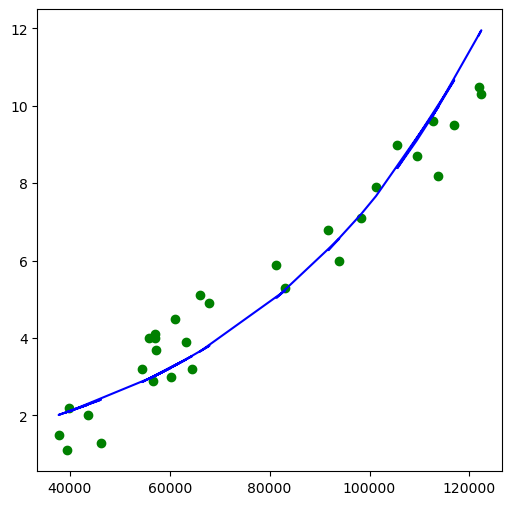

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.scatter(x=sd['Salary'],y=sd['YearsExperience'],color='green')
ax.plot(sd.Salary,datapred3,color='blue')
plt.show()

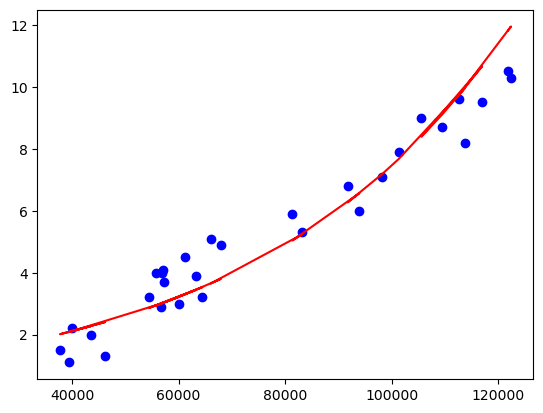

In [175]:
plt.plot(sd['Salary'],sd['YearsExperience'], 'bo')  
plt.plot(sd.Salary,datapred3,color='red')

In [176]:
emp_resid = model3.resid_pearson 
emp_resid

array([-2.62856286, -2.53520584, -1.21165179, -0.52900213,  0.1783699 ,
       -0.13544939, -0.29980314,  0.46029816, -0.40618444,  0.82040237,
        0.51478963,  1.26232636,  1.16155444,  1.25249551,  1.28665421,
        1.0457908 ,  1.37594637,  0.05621983,  0.64733073, -0.37323186,
        0.33299592, -0.05546522,  0.12175325, -0.80873095, -0.18538208,
        0.28773542, -0.47627671, -0.05762179, -0.61313045, -0.48896426])

Text(0, 0.5, 'Standardized Residual')

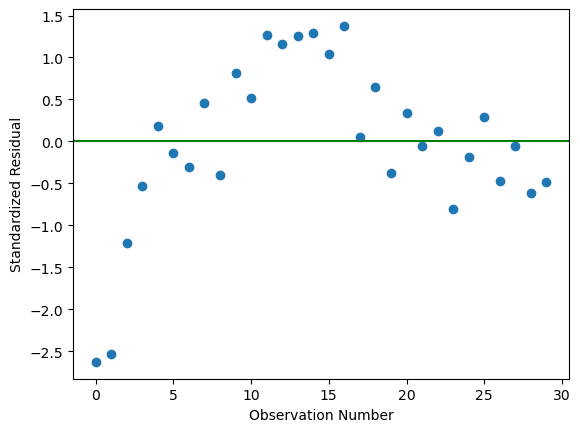

In [177]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

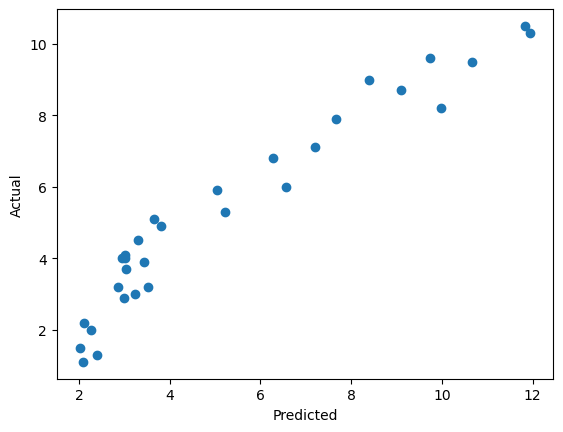

In [178]:
plt.scatter(x=datapred3,y=sd.YearsExperience)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [181]:
# created a new coloumn of squares of salary 
sd["Salary_Sq"] = sd.Salary*sd.Salary
sd  

,YearsExperience,Salary,Salary_Sq
0,1.1,39343.0,1.547872e+09
1,1.3,46205.0,2.134902e+09
2,1.5,37731.0,1.423628e+09
3,2.0,43525.0,1.894426e+09
4,2.2,39891.0,1.591292e+09
5,2.9,56642.0,3.208316e+09
6,3.0,60150.0,3.618022e+09
7,3.2,54445.0,2.964258e+09
8,3.2,64445.0,4.153158e+09
9,3.7,57189.0,3.270582e+09


In [184]:
model_quad = smf.ols("np.log(YearsExperience)~Salary+Salary_Sq",data=sd).fit()
model_quad.params

Intercept   -1.536857e+00
Salary       6.153230e-05
Salary_Sq   -2.513940e-10
dtype: float64

In [183]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.901
Method:                      Least Squares   F-statistic:                     132.3
Date:                     Wed, 04 Jan 2023   Prob (F-statistic):           1.12e-14
Time:                             17:35:33   Log-Likelihood:                 7.7666
No. Observations:                       30   AIC:                            -9.533
Df Residuals:                           27   BIC:                            -5.330
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary      6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
Salary_Sq  -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
#we have used log(YearsExperience) in preparing model so we need to converting
pred_quad = model_quad.predict(sd)
datapred4=np.exp(pred_quad)  
datapred4

0     1.640306
1     2.158776
2     1.532540
3     1.944664
4     1.678141
5     3.132728
6     3.507003
7     2.909766
8     3.992882
9     3.189644
10    3.851228
11    3.045589
12    3.165437
13    3.178363
14    3.613219
15    4.407015
16    4.178802
17    6.297870
18    6.082301
19    7.576149
20    7.332354
21    8.022489
22    8.303352
23    9.114878
24    8.901371
25    8.648772
26    9.216598
27    9.065610
28    9.284743
29    9.284136
dtype: float64

In [186]:
rmse_quad = np.sqrt(np.mean((np.array(sd['YearsExperience'])-np.array(datapred4))**2))
rmse_quad 

0.7214302704516455

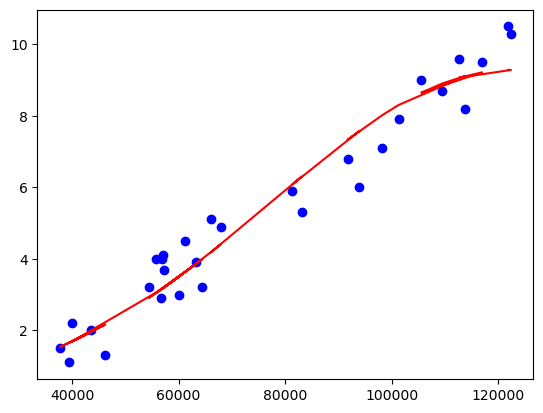

In [187]:
plt.scatter(sd.Salary,sd.YearsExperience,c="b")
plt.plot(sd.Salary,datapred4,"r")

Text(0, 0.5, 'Standardized Residual')

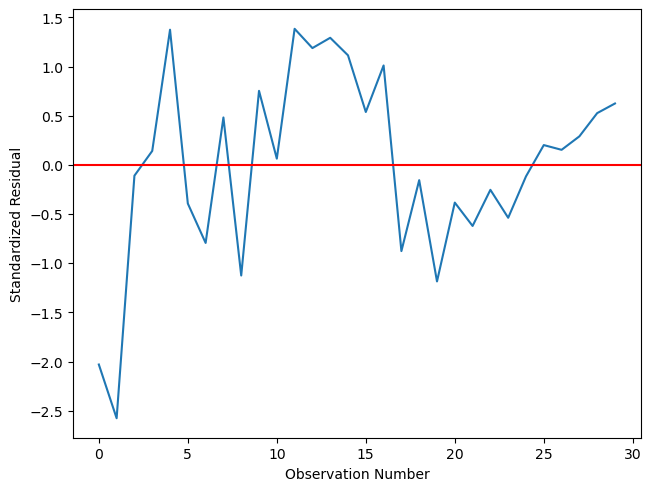

In [188]:
x = np.linspace(0.01, 5.0, 501)
fig= plt.subplots( constrained_layout=True, sharey=True)
plt.plot(np.arange(30), model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel('Observation Number')
plt.ylabel('Standardized Residual')

Text(0, 0.5, 'Standardized Residual')

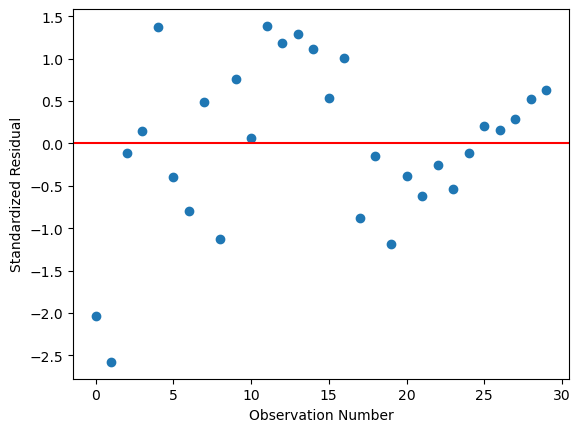

In [189]:
plt.scatter(np.arange(30),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

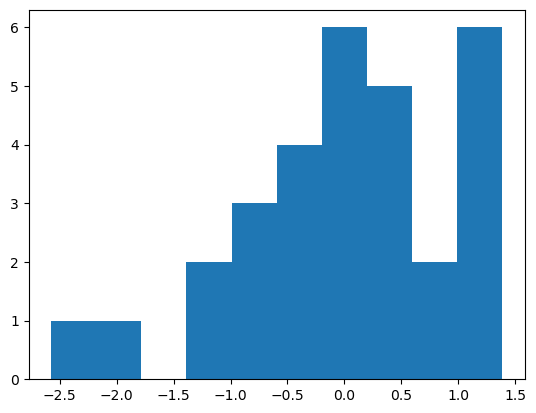

In [190]:
plt.hist(model_quad.resid_pearson)
plt.show() 

In [191]:
sd = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(sd)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,0.727768,0.956957
1,rmse_log,0.727768,0.931967
2,rmse_exp,0.864954,0.853889
3,rmse_quad,0.721430,0.907383


In [192]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

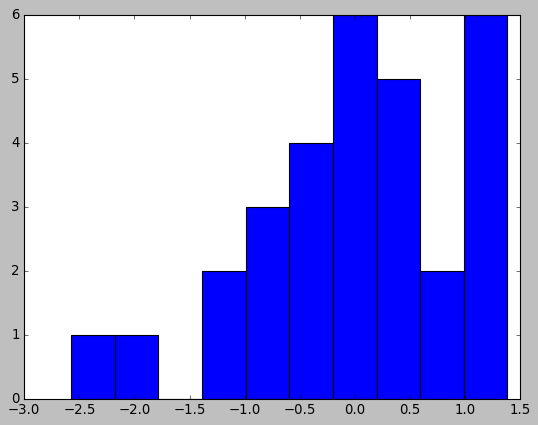

In [193]:
plt.hist(model_quad.resid_pearson)  
plt.show() 